In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys
import os
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import laplace  # Import laplace for generating Laplacian noise
# Add the path to the `src/estimator/` directory

# Navigate to the parent directory (fdp-estimation) and add `src` to the path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
sys.path.append(project_root)

# Import KDE_Estimator from estimator_kde
from estimator.estimator_kde import KDE_Estimator

In [7]:

# Parameters
sigma = 1
x1 = np.array([1] + [0] * 9)
x2 = np.zeros(10)

# Define the Laplace Mechanism
def Sum_Laplace(x):
    s = np.sum(x) + laplace.rvs(loc=0, scale=sigma)
    return s

# Define input parameters
N = 10**6  # Example number of samples; replace with appropriate value
h = 0.1   # Example bandwidth; replace with appropriate value
eta_max = 15

# Call KDE_Estimator
output_df = KDE_Estimator(eta_max=eta_max, Mechanism=Sum_Laplace, x1=x1, x2=x2, N=N, h=h)
# Extract alpha and beta for plotting
alpha = output_df["alpha"]
beta = output_df["beta"]

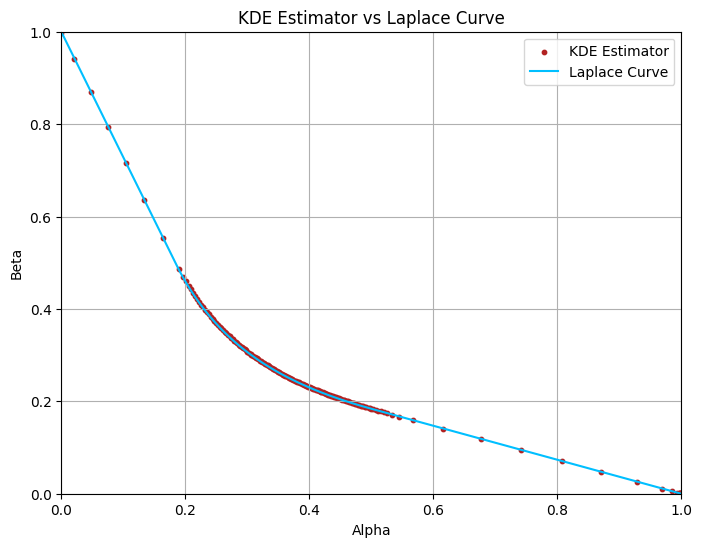

In [8]:
# Define mu_2 parameter
mu_2 = 1

# Define the Laplace curve function
def Laplace_curve(alpha):
    if alpha < np.exp(-mu_2) / 2:
        return 1 - np.exp(mu_2) * alpha
    elif np.exp(-mu_2) / 2 <= alpha <= 1 / 2:
        return np.exp(-mu_2) / (4 * alpha)
    elif alpha > 1 / 2:
        return np.exp(-mu_2) * (1 - alpha)
    else:
        return 0

# Vectorize the function for plotting
Laplace_curve_vec = np.vectorize(Laplace_curve)

# Plot the results
plt.figure(figsize=(8, 6))

# Scatter plot for KDE Estimator results
plt.scatter(alpha, beta, color="firebrick", s=10, label="KDE Estimator")

# Plot the Laplace curve
alpha_values = np.linspace(0, 1, 1000)
plt.plot(alpha_values, Laplace_curve_vec(alpha_values), color="deepskyblue", linewidth=1.5, label="Laplace Curve")

# Plot aesthetics
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel("Alpha")
plt.ylabel("Beta")
plt.title("KDE Estimator vs Laplace Curve")
plt.legend()
plt.grid()

# Show the plot
plt.show()